## Web Crawing
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지 
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

#### 크롤링 방법에 따른 속도
- requests json > requests html > selenium

### Crwaling Naver Stock Datas
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : url
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [95]:
import warnings
warnings.filterwarnings('ignore') #경고 메시지를 뜨지 않게 설정
import pandas as pd
import requests

#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [96]:
page, page_size = 1, 10
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'
url

'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=1'

#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [97]:
response = requests.get(url)
response
#200은 상태 코드 200이면 정상적으로 데이터를 받아온 것

<Response [200]>

In [98]:
response.text[:300]

'[{"localTradedAt":"2023-02-16","closePrice":"2,471.65","compareToPreviousClosePrice":"43.75","compareToPreviousPrice":{"code":"2","text":"상승","name":"RISING"},"fluctuationsRatio":"1.80","openPrice":"2,444.06","highPrice":"2,475.99","lowPrice":"2,442.07"},{"localTradedAt":"2023-02-15","closePrice":"2'

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [99]:
type(response)

requests.models.Response

In [100]:
data=response.json()
type(data)

list

In [101]:
df = pd.DataFrame(data)[['localTradedAt','closePrice']]
#리스트 안에 딕셔너리가 있는 상태
df

,localTradedAt,closePrice
0,2023-02-16,"2,471.65"
1,2023-02-15,"2,427.90"
2,2023-02-14,"2,465.64"
3,2023-02-13,"2,452.70"
4,2023-02-10,"2,469.73"
5,2023-02-09,"2,481.52"
6,2023-02-08,"2,483.64"
7,2023-02-07,"2,451.71"
8,2023-02-06,"2,438.19"
9,2023-02-03,"2,480.40"


#### 4. 함수로 만들기

In [102]:
def stock_price(code='KOSPI', page=1,page_size=20) : 
    '''
        This function is crawling stock price from naver.
       params : 
           code : str : KOSPI, KOSDAQ
           page : int
           page_size : int
       return :
           type: DataFrame
    '''
    #1. URL
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}'
    #2. request(URL) response : json(str)
    response = requests.get(url)
    
    #3. json(str) > list, dict > DataFrane
    data=response.json()
    return pd.DataFrame(data)[['localTradedAt', 'closePrice']]


In [103]:
df=stock_price(page_size=60)
df.tail(2)

,localTradedAt,closePrice
58,2022-11-23,"2,418.01"
59,2022-11-22,"2,405.27"


In [104]:
help(stock_price)
#또는 쉬프트+탭

Help on function stock_price in module __main__:

stock_price(code='KOSPI', page=1, page_size=20)
     This function is crawling stock price from naver.
    params : 
        code : str : KOSPI, KOSDAQ
        page : int
        page_size : int
    return :
        type: DataFrame



In [105]:
print

<function print>

In [106]:
type(response) #response.json()

requests.models.Response

In [107]:
dir(response) #객체에서 사용할 수 있는 함수
#[var for var in dir(response) if var[0] != '_'] # 스페셜 함수 제외

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

#### 5. 원달러 환율 데이터 수집 : 실습

In [108]:
def exchange_rate(code='FX_USDKRW',page=1) : 
    #1. URL
    url = f'https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&category=exchange&reutersCode={code}'
    #2. request(URL) > response(json(str))
    response = requests.get(url)
    #3. json(str) list, dict > DataFrame
    data=response.json()['result']
    return pd.DataFrame(data)[['localTradedAt', 'closePrice']]

In [109]:
usd_1 = exchange_rate(page=1)
usd_2 = exchange_rate(page=2)
usd_df =pd.concat([usd_1, usd_2], ignore_index=True)
usd_df.tail(2)

,localTradedAt,closePrice
18,2023-01-19,"1,237.00"
19,2023-01-18,"1,230.00"


In [110]:
usd_df

,localTradedAt,closePrice
0,2023-02-16,"1,283.00"
1,2023-02-15,"1,289.00"
2,2023-02-14,"1,270.00"
3,2023-02-13,"1,279.00"
4,2023-02-10,"1,270.50"
5,2023-02-09,"1,259.00"
6,2023-02-08,"1,260.00"
7,2023-02-07,"1,262.00"
8,2023-02-06,"1,258.00"
9,2023-02-03,"1,251.00"


In [111]:
kospi_df = stock_price()
kospi_df.tail(2)

,localTradedAt,closePrice
18,2023-01-19,"2,380.34"
19,2023-01-18,"2,368.32"


In [112]:
kosdaq_df = stock_price(code='KOSDAQ')
kosdaq_df.tail(2)

,localTradedAt,closePrice
18,2023-01-19,712.89
19,2023-01-18,711.75


In [113]:
#데이터 전처리 : 데이터 타입 변경 #astype을 쓰더라도 ','를 지워야됨
usd_1 = exchange_rate(page=1)
usd_2 = exchange_rate(page=2)
usd_df =pd.concat([usd_1, usd_2], ignore_index=True)
usd_df['usd']= usd_df['closePrice'].apply(lambda data : float(data.replace(',', '')))
usd_df.dtypes

localTradedAt     object
closePrice        object
usd              float64
dtype: object

In [114]:
usd_df.tail(2)

,localTradedAt,closePrice,usd
18,2023-01-19,"1,237.00",1237.0
19,2023-01-18,"1,230.00",1230.0


In [115]:
#kospi_df, kosdaq_df =stock_price(code='KOSPI'), stock_price(code='KOSDAQ')
#kospi_df['kospi']= usd_df['closePrice'].apply(lambda data : float(data.replace(',', '')))
#kosdaq_df['kosdaq']= usd_df['closePrice'].apply(lambda data : float(data.replace(',', '')))

kospi_df, kosdaq_df = stock_price(), stock_price(code='KOSDAQ') 
kospi_df['kospi'] = kospi_df['closePrice'].apply(lambda data: float(data.replace(',', ''))) 
kosdaq_df['kosdaq'] = kosdaq_df['closePrice'].apply(lambda data: float(data.replace(',', '')))

In [116]:
kosdaq_df.dtypes

localTradedAt     object
closePrice        object
kosdaq           float64
dtype: object

In [117]:
kospi_df

,localTradedAt,closePrice,kospi
0,2023-02-16,"2,471.42",2471.42
1,2023-02-15,"2,427.90",2427.90
2,2023-02-14,"2,465.64",2465.64
3,2023-02-13,"2,452.70",2452.70
4,2023-02-10,"2,469.73",2469.73
5,2023-02-09,"2,481.52",2481.52
6,2023-02-08,"2,483.64",2483.64
7,2023-02-07,"2,451.71",2451.71
8,2023-02-06,"2,438.19",2438.19
9,2023-02-03,"2,480.40",2480.40


In [118]:
#df= usd_df.copy()
#df['kospi']=kospi_df['kospi']
#df['kosdaq']=kosdaq_df['kosdaq']
#df=df.drop(columns=['closePrice'])
#df.tail(2)

df = usd_df.copy() 
df['kospi'] = kospi_df['kospi'] 
df['kosdaq'] = kosdaq_df['kosdaq'] 
df = df.drop(columns=['closePrice']) 
df

,localTradedAt,usd,kospi,kosdaq
0,2023-02-16,1283.0,2471.42,782.71
1,2023-02-15,1289.0,2427.90,765.46
2,2023-02-14,1270.0,2465.64,779.58
3,2023-02-13,1279.0,2452.70,772.55
4,2023-02-10,1270.5,2469.73,772.44
5,2023-02-09,1259.0,2481.52,784.58
6,2023-02-08,1260.0,2483.64,779.98
7,2023-02-07,1262.0,2451.71,772.79
8,2023-02-06,1258.0,2438.19,761.33
9,2023-02-03,1251.0,2480.40,766.79


In [119]:
#lambda : 파라미터와 리턴으로 이루어진 함수를 간단하게 작성하는 방법


In [120]:
#얕은복사, 깊은 복사
# 얕은복사, 깊은복사 
data1 = [1, 2, 3] 
data2 = data1 #주소를 공유
data3 = data1.copy() # 다른 공간에 카피
 
print(data1, data2, data3) 
data1[1] = 4 
print(data1, data2, data3)

[1, 2, 3] [1, 2, 3] [1, 2, 3]
[1, 4, 3] [1, 4, 3] [1, 2, 3]


In [121]:
id(data1), id(data2), id(data3)

(2188660030016, 2188660030016, 2188660030208)

#### 6. 시각화

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

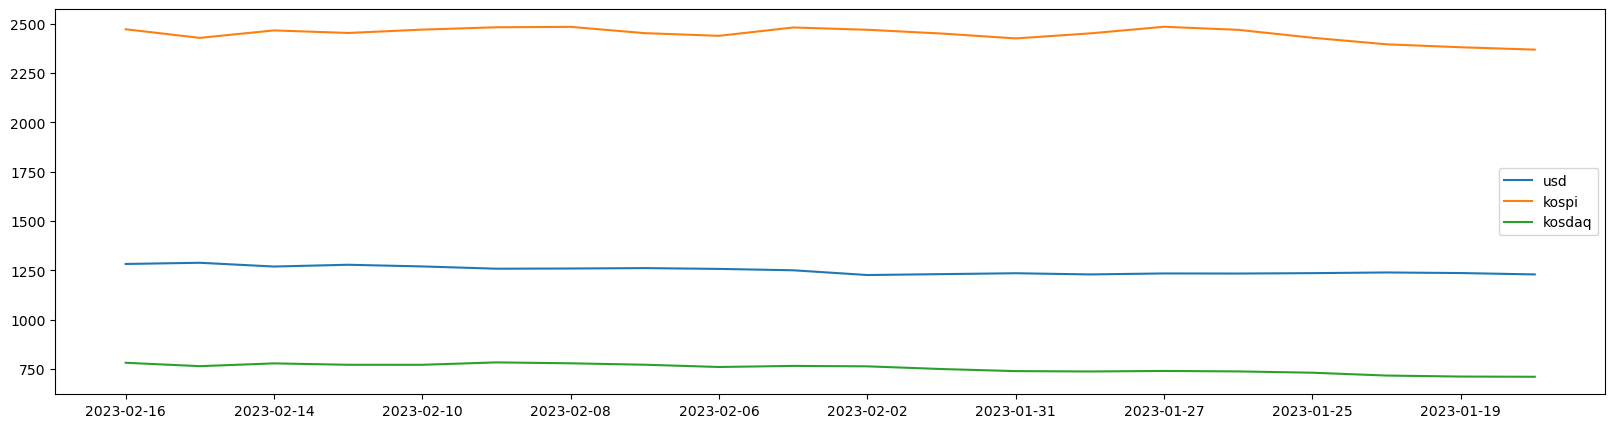

In [123]:
plt.figure(figsize=(20,5))
plt.plot(df['localTradedAt'],df['usd'], label='usd')
plt.plot(df['localTradedAt'],df['kospi'], label='kospi')
plt.plot(df['localTradedAt'],df['kosdaq'], label='kosdaq')
plt.xticks(df['localTradedAt'][::2])
plt.legend()
plt.show()

#### 7. 데이터 스케일링
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

In [124]:
from sklearn.preprocessing import minmax_scale

In [125]:
minmax_scale(df['usd'])

array([0.90322581, 1.        , 0.69354839, 0.83870968, 0.7016129 ,
       0.51612903, 0.53225806, 0.56451613, 0.5       , 0.38709677,
       0.        , 0.07258065, 0.14516129, 0.0483871 , 0.12903226,
       0.12096774, 0.15322581, 0.20967742, 0.16129032, 0.0483871 ])

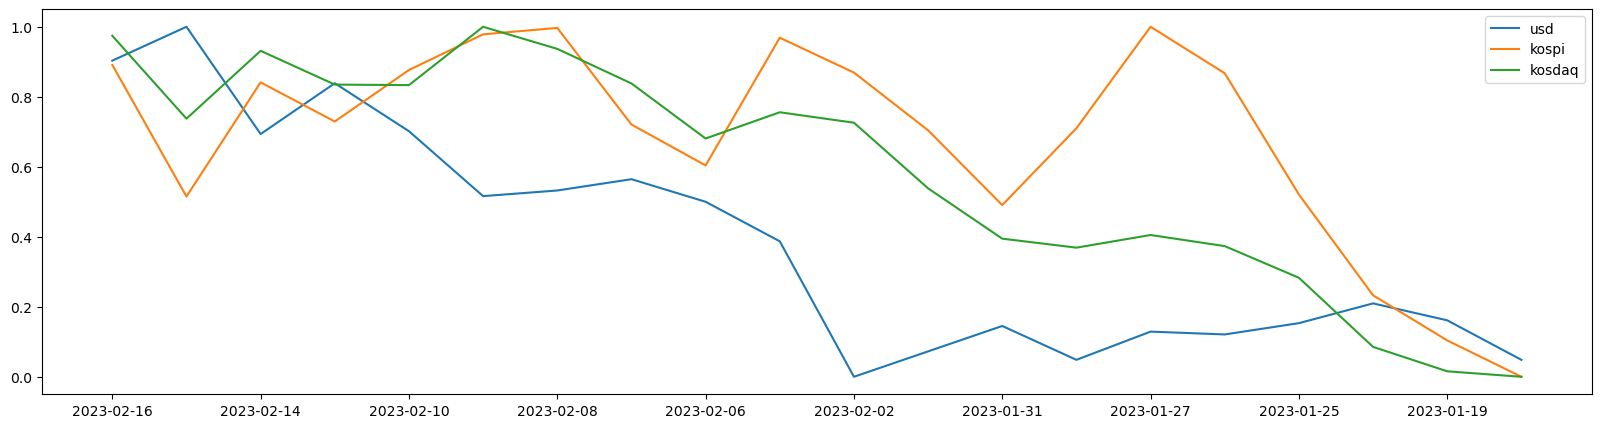

In [126]:
plt.figure(figsize=(20,5))
plt.plot(df['localTradedAt'],minmax_scale(df['usd']), label='usd')
plt.plot(df['localTradedAt'],minmax_scale(df['kospi']), label='kospi')
plt.plot(df['localTradedAt'],minmax_scale(df['kosdaq']), label='kosdaq')
plt.xticks(df['localTradedAt'][::2])
plt.legend()
plt.show()

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임
    - 1에 가까울수록 서로 같은방향으로 움직임
    - 0에 가까울수록 두 데이터는 관계가 없음

In [127]:
df.corr()

,usd,kospi,kosdaq
usd,1.000000,0.293439,0.721134
kospi,0.293439,1.000000,0.778798
kosdaq,0.721134,0.778798,1.000000


In [ ]:
#usd-kospu : -0.5
#kosdaq-kospi : 0.9